# Intro to Unsupervised Machine Learning

**Service/Destination Recommendations** - Based on Travel Review Ratings

Objective: Suggest services or destinations based on user reviews.

Method: Similarity-based collaborative filtering algorithms.


#### Loading and preparing the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('google_review_ratings.csv')

In [5]:
df = df.drop(columns='Unnamed: 25')

In [6]:
column_mapping = {
    'Category 1': 'Churches',
    'Category 2': 'Resorts',
    'Category 3': 'Beaches',
    'Category 4': 'Parks',
    'Category 5': 'Theatres',
    'Category 6': 'Museums',
    'Category 7': 'Malls',
    'Category 8': 'Zoo',
    'Category 9': 'Restaurants',
    'Category 10': 'Pubs_Bars',
    'Category 11': 'Local_Services',
    'Category 12': 'Burger_Pizza_Shops',
    'Category 13': 'Hotels_Other_Lodgings',
    'Category 14': 'Juice_Bars',
    'Category 15': 'Art_Galleries',
    'Category 16': 'Dance_Clubs',
    'Category 17': 'Swimming_Pools',
    'Category 18': 'Gyms',
    'Category 19': 'Bakeries',
    'Category 20': 'Beauty_Spas',
    'Category 21': 'Cafes',
    'Category 22': 'View_Points',
    'Category 23': 'Monuments',
    'Category 24': 'Gardens'
}


df.rename(columns=column_mapping, inplace=True)
features = df.copy()

Preparing data

In [8]:
features = features.drop(columns='User')
features.fillna(0, inplace=True)
features['Local_Services'] = features['Local_Services'].replace(['2\t2', '2\t2.'], '2.2')
features['Local_Services'] = features['Local_Services'].astype(float)


In [10]:
features.describe().T


,count,mean,std,min,25%,50%,75%,max
Churches,5456.0,1.455720,0.827604,0.00,0.92,1.340,1.8100,5.0
Resorts,5456.0,2.319707,1.421438,0.00,1.36,1.905,2.6825,5.0
Beaches,5456.0,2.489331,1.247815,0.00,1.54,2.060,2.7400,5.0
Parks,5456.0,2.796886,1.309159,0.83,1.73,2.460,4.0925,5.0
Theatres,5456.0,2.958941,1.339056,1.12,1.77,2.670,4.3125,5.0
Museums,5456.0,2.893490,1.282400,1.11,1.79,2.680,3.8400,5.0
Malls,5456.0,3.351395,1.413492,1.12,1.93,3.230,5.0000,5.0
Zoo,5456.0,2.540795,1.111391,0.86,1.62,2.170,3.1900,5.0
Restaurants,5456.0,3.126019,1.356802,0.84,1.80,2.800,5.0000,5.0
Pubs_Bars,5456.0,2.832729,1.307665,0.81,1.64,2.680,3.5300,5.0


In [ ]:
# histogram
features.hist(bins=5, figsize=(20, 15))
plt.tight_layout()
plt.show()

Scalling

In [11]:
scaler_minmax = MinMaxScaler()
features_scaled_x = scaler_minmax.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled_x, columns=features.columns)

### Test for Number K

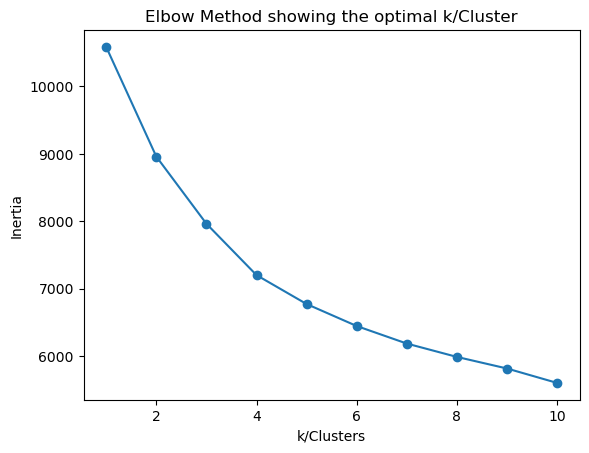

In [65]:
# Ebow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=5)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('k/Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method showing the optimal k/Cluster')
plt.show()

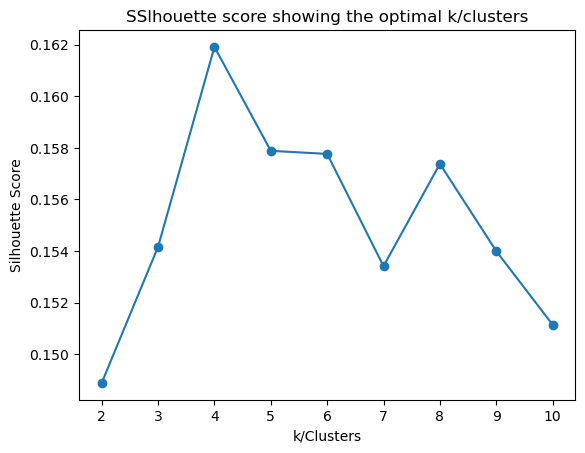

In [64]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # O silhouette score não faz sentido para k=1
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# silhouette score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('k/Clusters')
plt.ylabel('Silhouette Score')
plt.title('SSlhouette score showing the optimal k/clusters')
plt.show()


### ML created


In [56]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(features_scaled) 
df['Cluster'] = kmeans.labels_

In [57]:
features_scaled_cp = features_scaled.copy()

Heatmap per Cluster

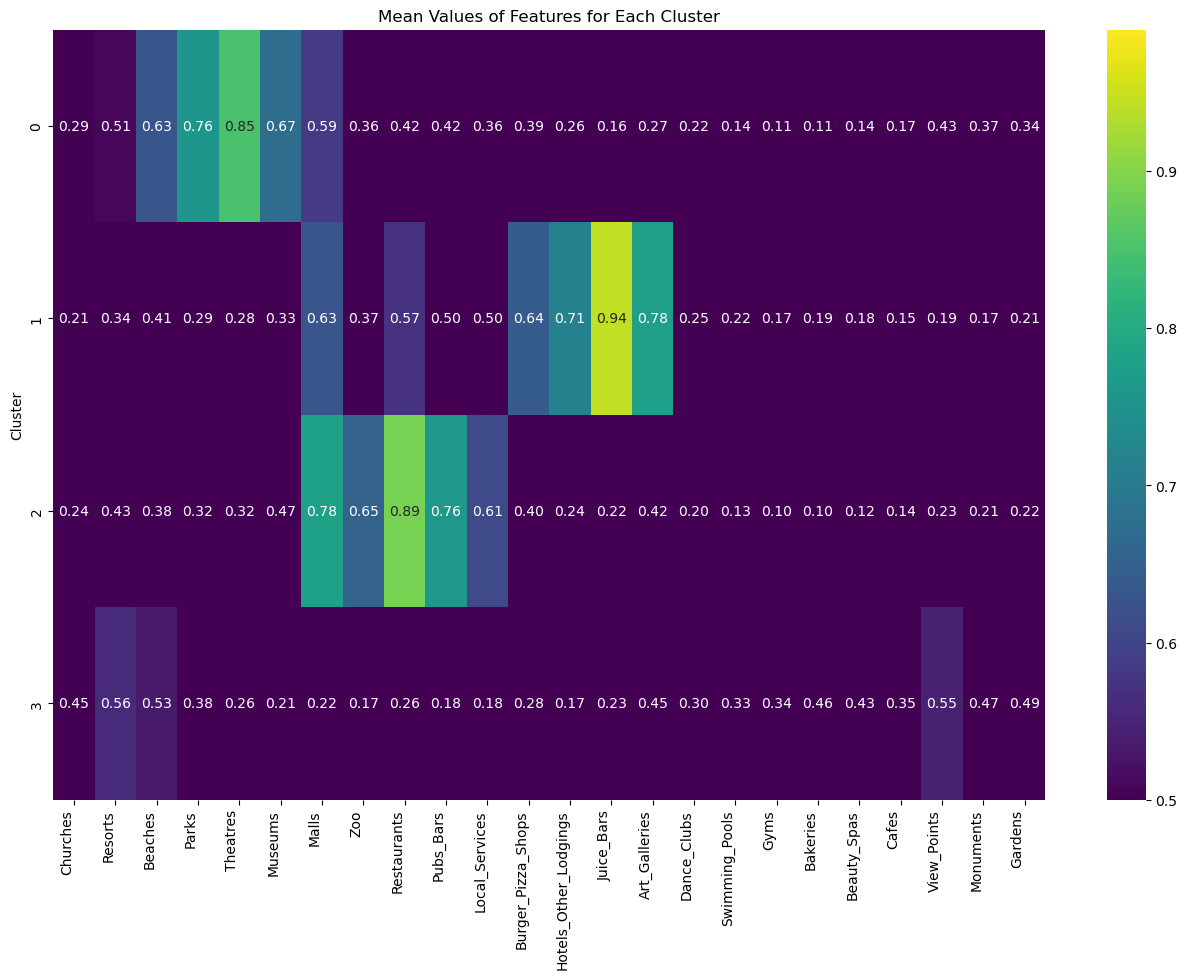

In [69]:
import seaborn as sns
features_scaled_cp['Cluster'] = df['Cluster']
plt.figure(figsize=(16, 10))
plt.xticks(rotation=45, ha='right')

sns.heatmap(features_scaled_cp.groupby('Cluster').mean(), annot=True, cmap='viridis', fmt='.2f', annot_kws={"size": 10}, vmin = 0.5, vmax = 0.99)
plt.title('Mean Values of Features for Each Cluster')


plt.show()


Creating a new dataframe by usar in order to predict.

In [1]:
def get_user_ratings(categories):
    print("""Please rate each of the categories from 0 to 5.  Y
          ou can use intermediate values like 0.5.""")
    print("If you do not want to rate a category, just press Enter.")
    
    user_ratings = []
    for category in categories:
        rating = None
        while rating is None:
            try:
                rating = input(f"{category}: ")
                if rating == "":
                    rating = 0
                else:
                    rating = float(rating)
                if not 0 <= rating <= 5:
                    print("Please enter a value between 0 and 5.")
                    rating = None
            except ValueError:
                print("Invalid input. Please enter a number.")
        user_ratings.append(rating) 

    return user_ratings

# List of categories
categories = ['Churches', 'Resorts', 'Beaches', 'Parks', 'Theatres', 'Museums',
              'Malls', 'Zoo', 'Restaurants', 'Pubs_Bars', 'Local_Services',
              'Burger_Pizza_Shops', 'Hotels_Other_Lodgings', 'Juice_Bars',
              'Art_Galleries', 'Dance_Clubs', 'Swimming_Pools', 'Gyms', 'Bakeries',
              'Beauty_Spas', 'Cafes', 'View_Points', 'Monuments', 'Gardens']

# Get user ratings
user_ratings = get_user_ratings(categories)


Please rate each of the categories from 0 to 5.  Y
          ou can use intermediate values like 0.5.
If you do not want to rate a category, just press Enter.
Please enter a value between 0 and 5.
Please enter a value between 0 and 5.


Predicting

In [60]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def recommend_cluster(user_ratings, scaler, kmeans, cols):
    clusters = {
    0:  """Cultural Adventurer Itinerary - Beaches, Theaters, Museums, Malls
            For those who relish a blend of relaxation and cultural enrichment, the Cultural Adventurer itinerary offers a perfect mix. 
            This journey takes you from serene beachside mornings to afternoons exploring historic theatres and engaging museums. 
            Evenings are filled with leisurely shopping at bustling malls, making it ideal for travelers who appreciate both relaxation and cultural activities. 
            The itinerary ensures a balanced experience with ample opportunities for sunbathing, learning, and indulging in retail therapy."""
            ,

    1: """Urban Connoisseur Itinerary - Malls, Restaurants, Dining, Hotels, Juice Bars, Art Galleries
            The Urban Connoisseur itinerary caters to those who thrive in vibrant city environments, combining the best of urban experiences. 
            It features days filled with shopping at sophisticated malls, indulging in gourmet dining at top-rated restaurants, and exploring the local art scene through various galleries. 
            Evenings are spent enjoying the luxuries of upscale hotels and savoring drinks at trendy juice bars, making it perfect for the modern traveler 
            who enjoys a refined, culturally rich urban escape."""
            ,
    2: """Social Explorer Itinerary - Malls, Zoo, Restaurants, Pubs, Bars, Local Services
            Designed for the socially inclined traveler, the Social Explorer itinerary emphasizes a lively and diverse range of activities. 
            It includes visits to local zoos for family-friendly fun, explorations of dynamic malls for shopping and entertainment, and evenings at vibrant pubs and bars for socializing. 
            This itinerary also integrates local services, such as markets and craft stores, offering a comprehensive experience that is ideal for those who enjoy mingling with locals 
            and experiencing the community’s offerings firsthand.
            """
            , 
    3: """Relaxation Seeker Itinerary - Resorts, Beaches, Viewpoints
            The Relaxation Seeker itinerary is perfect for travelers looking for a serene and rejuvenating escape. 
            It focuses on luxurious resort stays, idyllic beach visits, and breathtaking viewpoints. Days are spent unwinding by the ocean or pool, 
            while evenings offer peaceful moments at scenic vistas or pampering at resort spas. 
            This itinerary is designed for those who want to immerse themselves in natural beauty and tranquility, providing a stress-free and restorative vacation experience.""" 
    }

    user_ratings_df = pd.DataFrame([user_ratings], columns=cols)
    user_ratings_normalized = scaler.transform(user_ratings_df)

    recommended_cluster = kmeans.predict(user_ratings_normalized)
    
    return clusters[recommended_cluster[0]]


# Get the prediciton
recommended_cluster = recommend_cluster(user_ratings, scaler_minmax, kmeans, features.columns)

# Results
print(f"Recommended Cluster: \n {recommended_cluster}")


Recommended Cluster: 
 Cultural Adventurer Itinerary - Beaches, Theaters, Museums, Malls
            For those who relish a blend of relaxation and cultural enrichment, the Cultural Adventurer itinerary offers a perfect mix. 
            This journey takes you from serene beachside mornings to afternoons exploring historic theatres and engaging museums. 
            Evenings are filled with leisurely shopping at bustling malls, making it ideal for travelers who appreciate both relaxation and cultural activities. 
            The itinerary ensures a balanced experience with ample opportunities for sunbathing, learning, and indulging in retail therapy.


### gap stat (Optional)

In [ ]:
!pip install gap-stat


Optimal number of clusters: 10


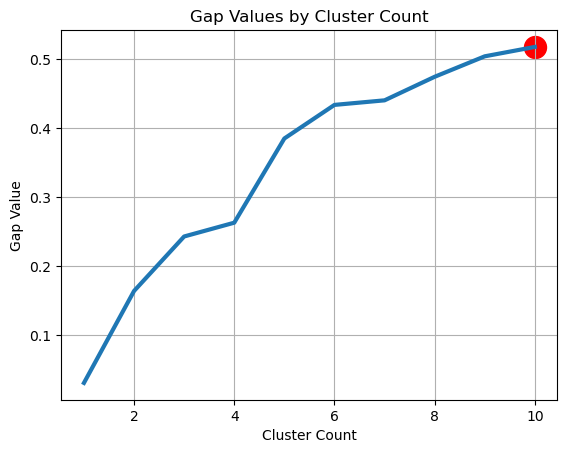

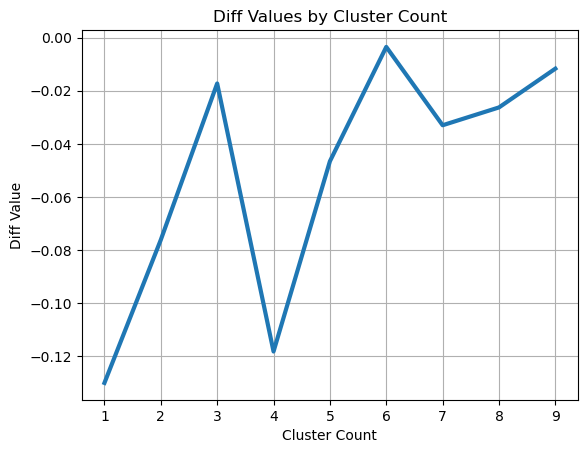

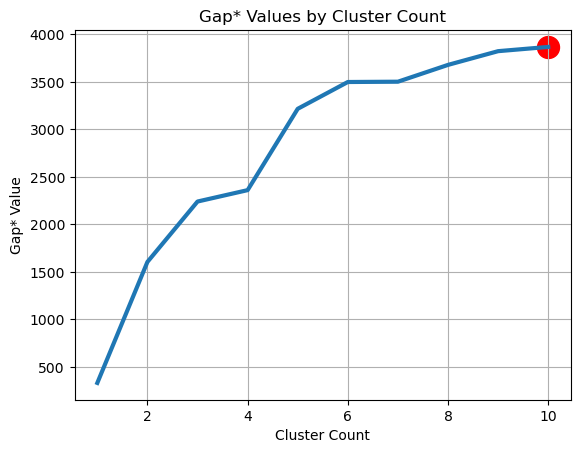

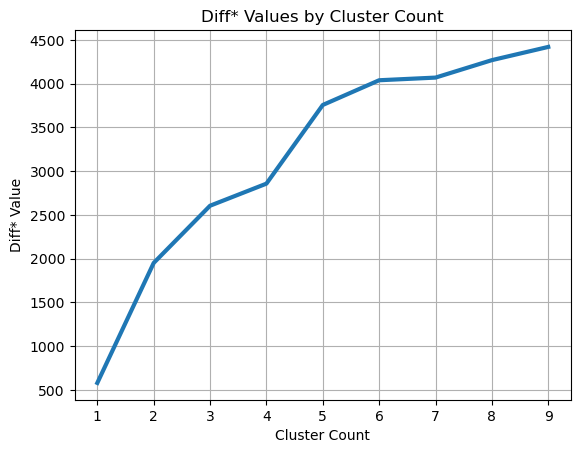

In [40]:
from gap_statistic import OptimalK

# Determinar o número ótimo de clusters usando Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(features_scaled, cluster_array=list(range(1, 11)))
print('Optimal number of clusters:', n_clusters)

# Plotar o gráfico do Gap Statistic
optimalK.plot_results()


### AgglomerativeClustering Test (Optional)

In [44]:
from sklearn.decomposition import PCA

# 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)



In [42]:
from sklearn import cluster


In [50]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=9,linkage='ward')
pred = agglomerative.fit_predict(features_scaled)


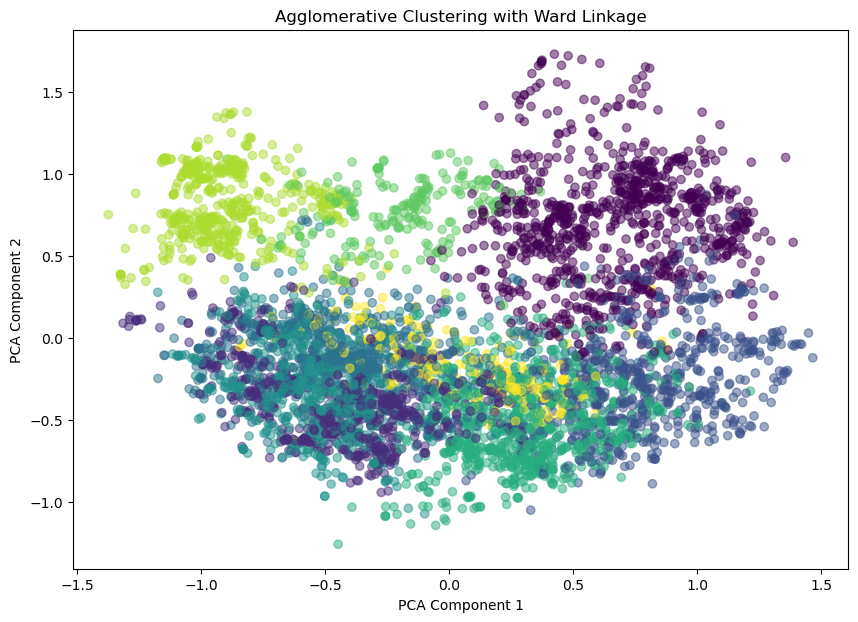

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=pred, alpha=0.5, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering with Ward Linkage')
plt.show()

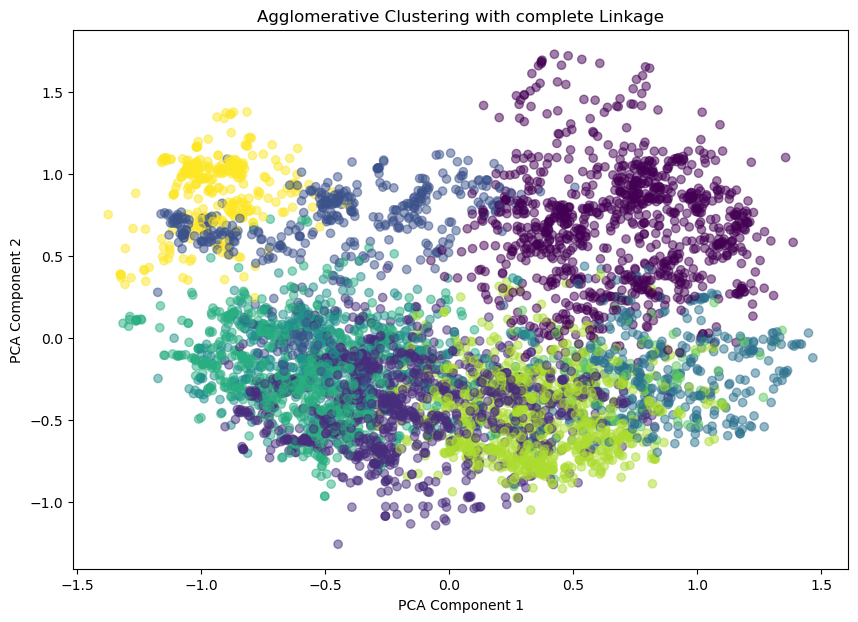

In [66]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=9,linkage='complete')
pred = agglomerative.fit_predict(features_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=pred, alpha=0.5, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering with complete Linkage')
plt.show()

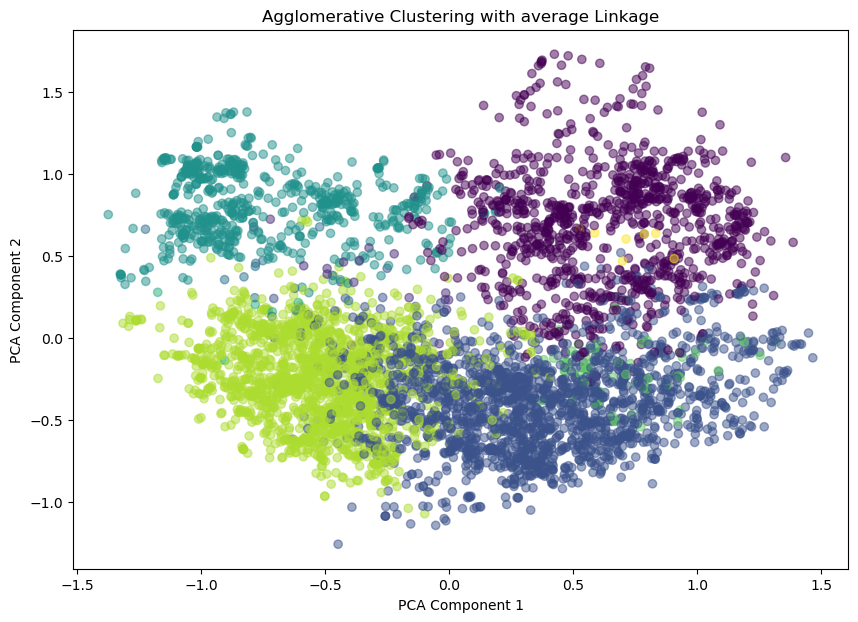

In [67]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=9,linkage='average')
pred = agglomerative.fit_predict(features_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=pred, alpha=0.5, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering with average Linkage')
plt.show()

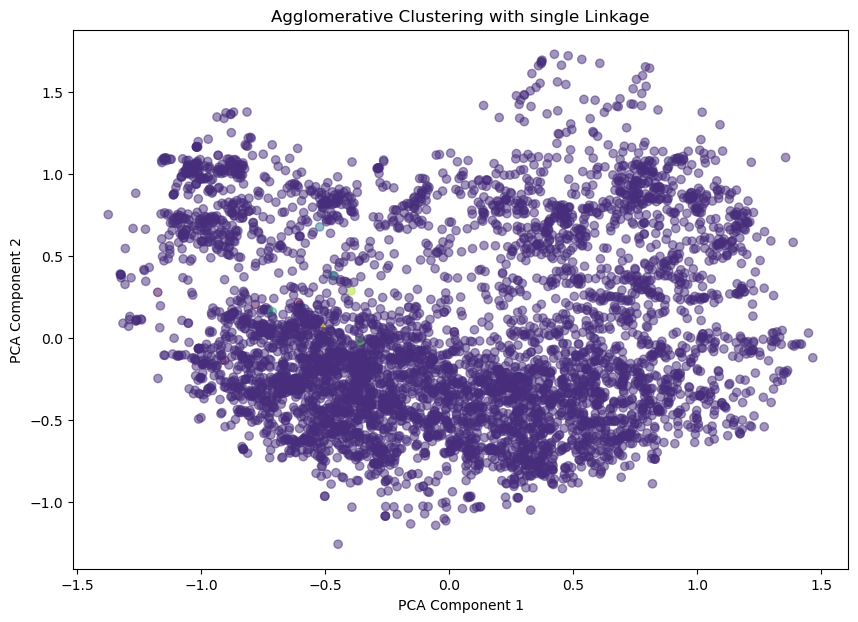

In [68]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=9,linkage='single')
pred = agglomerative.fit_predict(features_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=pred, alpha=0.5, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Agglomerative Clustering with single Linkage')
plt.show()